# Analysing a PPG signal 


In [2]:
#First let's import
!pip install heartpy
import matplotlib.pyplot as plt
import pandas as pd

     |████████████████████████████████| 1.0MB 2.8MB/s 


HeartPy comes with a function ***load_exampledata()*** that can load the datasets provded. It will return a tuple (data, timer), where 'timer' is the timer column (ms or datetime). If no timer column is available a tuple is still returned, but with timer array being empty.

There's three datasets included with HeartPy:
- 0 : a short, very clean PPG signal, sampled at 100.0 Hz
- 1 : a slightly longer (~2 minute) PPG signal, with missing signal in first third, and random noise spikes in rest of signal
- 2 : a long (~11.5 minute) PPG signal recorded 'in the wild' while driving in a driving simulator using a Pulse Sensor on the index finger and an Arduino

---------

In [3]:
import heartpy as hp

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
'''data, time = hp.load_exampledata(0)
df = pd.DataFrame(data)
print(df.head(2))'''

       0
0  530.0
1  518.0


In [22]:
'''from google.colab import files
df.to_csv('filename.csv') 
files.download('filename.csv')'''

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Loading our PPG signal from shimmer dataset**

In [34]:
dataset = pd.read_csv(r'/content/drive/My Drive/filename.csv', sep=",", engine='python') #Read data from CSV datafile
print(dataset.head(6))

      0.00
0  1180.95
1  1175.82
2  1171.43
3  1168.50
4  1169.23
5  1171.43


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

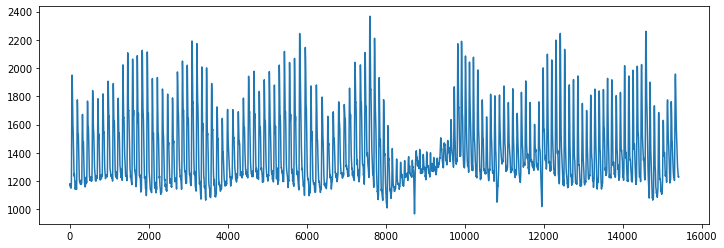

In [35]:
#first let's load the clean PPG signal


plt.figure(figsize=(12,4))
plt.plot(dataset)
plt.show()



when running ***hp.process()***, two dicts are returned: working_data (containing working data that you may want to access nonetheless, like peak positions and peak-peak intervals), and measures (containing the computed output measures).


In [39]:
#converting our dataframe into 1D array of heart rate signal

datanew = dataset.values.flatten()
print(datanew.shape)

(15410,)


In [40]:
#run the analysis
wd, m = hp.process(datanew, sample_rate = 100.0)



Heartpy comes with a function ***hp.plotter(wd, m)*** that does just this. The function requires you to give it the working_data and measures dict.



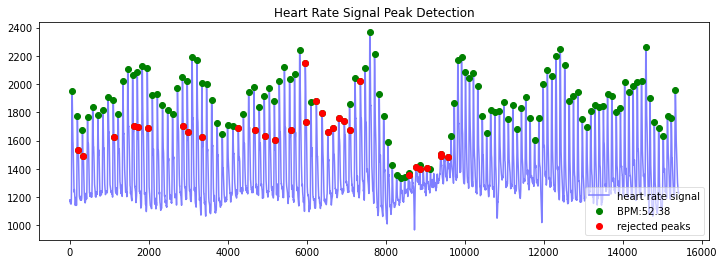

bpm: 52.379611
ibi: 1145.483871
sdnn: 116.050750
sdsd: 30.377110
rmssd: 50.126422
pnn20: 0.620253
pnn50: 0.253165
hr_mad: 70.000000
sd1: 35.394859
sd2: 146.119874
s: 16247.978817
sd1/sd2: 0.242232
breathingrate: 0.103257


In [41]:
#set large figure
plt.figure(figsize=(12,4))

#call plotter
hp.plotter(wd, m)

#display measures computed
for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))

**Now, a comparison with the pre-loaded example PPG signals in HeartPy library collected during exercise**

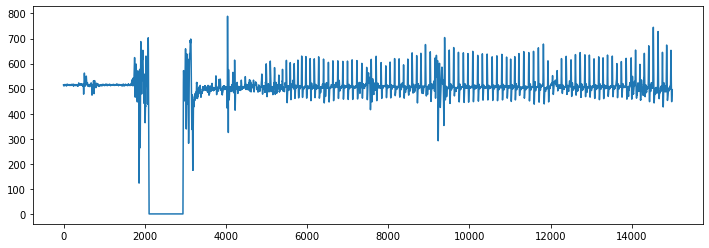

In [ ]:
data, timer = hp.load_exampledata(1)

plt.figure(figsize=(12,4))
plt.plot(data)
plt.show()

This is a more tricky signal I made intentionally. There's no signal in the beginning as I started recording before and while putting on the sensor. After the signal commences there's a few noise spikes as I forcefully moved the sensor while recording. This imitates what may happen when recording 'in the wild' as well if the participant moves and accidentally tugs at a sensor cable.

HeartPy is designed to handle this sort of thing out of the box. Let's look at the example first:

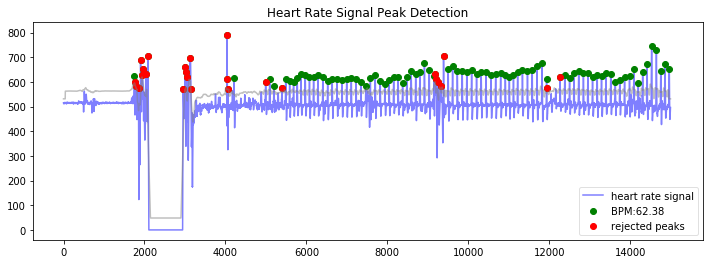

bpm: 62.376304
ibi: 961.903744
sdnn: 64.613519
sdsd: 29.871930
rmssd: 57.069746
pnn20: 0.797297
pnn50: 0.486486
hr_mad: 47.010333
sd1: 40.344402
sd2: 81.621935
s: 10345.227446
sd1/sd2: 0.494284
breathingrate: 0.155994


In [ ]:
sample_rate = hp.get_samplerate_mstimer(timer)

wd, m = hp.process(data, sample_rate)

#plot
plt.figure(figsize=(12,4))
hp.plotter(wd, m)

#display measures computed
for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))

Note we computed the sample_rate from a timer column (that was in ms values). This is important beforehand since we didn't know with what sample_rate the signal was sampled. All measures depend on knowing the sample rate.

HeartPy comes with two functions: ***hp.get_samplerate_mstimer()*** that computes sample rate based on a ms-timer, and ***hp.get_samplerate_datetime()***, that computes sample_rate based on a column in datetime values.

You saw how we used the mstimer earlier, now let's look at a 'in the wild' recording that uses datetime strings to encode time:

In [ ]:
data, timer = hp.load_exampledata(2)

print(timer[0])

2016-11-24 13:58:58.081000


When computing the sample rate we need to give ***get_samplerate_datetime()*** the format of the string (by default it expects HH:MM:SS.ms):

In [ ]:
sample_rate = hp.get_samplerate_datetime(timer, timeformat='%Y-%m-%d %H:%M:%S.%f')

print('sample rate is: %f Hz' %sample_rate)

sample rate is: 100.419711 Hz


Now that we know all that, running the analysis is the same as before:


Finished in 0.248689 sec


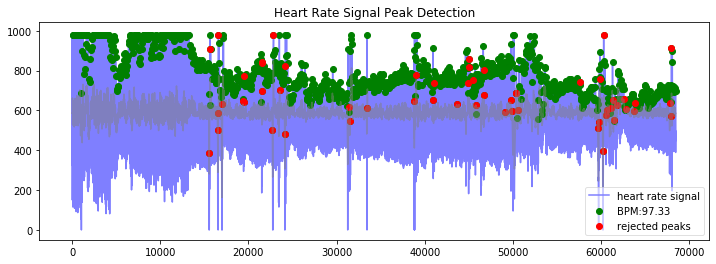

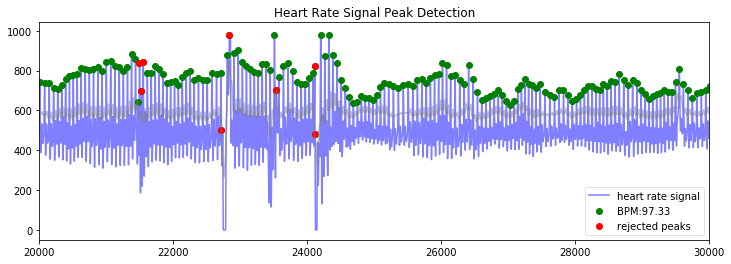

bpm: 97.325149
ibi: 616.490194
sdnn: 57.916589
sdsd: 30.173744
rmssd: 38.181375
pnn20: 0.320281
pnn50: 0.086345
hr_mad: 29.874613
sd1: 26.997110
sd2: 75.178572
s: 6376.189507
sd1/sd2: 0.359106
breathingrate: 0.258103


In [ ]:
wd, m = hp.process(data, sample_rate, report_time = True)

#plot
plt.figure(figsize=(12,4))
hp.plotter(wd, m)

#let's zoom in on a bit
plt.figure(figsize=(12,4))
plt.xlim(20000, 30000)
hp.plotter(wd, m)

#display measures computed
for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))